In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Step1: Load data

* using skipinitialspace to remove extra space
* using na_value to see ? as NA

In [37]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', skipinitialspace=True, na_values="?")
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 
                     'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 
                     'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
df.describe()
df.sample(4)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
2881,53,Private,196328,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,40,United-States,<=50K
14583,56,Private,98361,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,NaN,>50K
30842,54,Private,144586,Some-college,10,Married-civ-spouse,Sales,Wife,White,Female,0,0,40,United-States,>50K
13467,30,Private,169104,Assoc-acdm,12,Never-married,Other-service,Other-relative,Asian-Pac-Islander,Male,0,0,40,Vietnam,<=50K


## EDA:
Target is income >50K or <=50K

### Age distribution

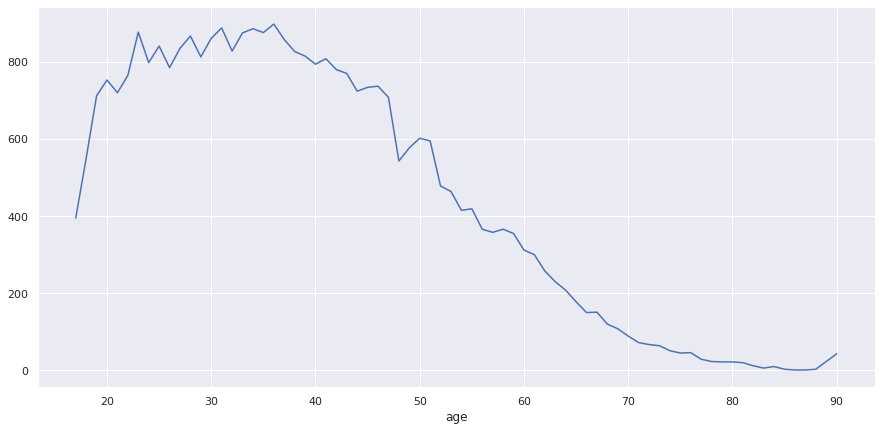

In [18]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['age']).count()['income'].plot(ax=ax)


## Quantitative vs Qualitative

In [4]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [5]:
quantitative = [f for f in df.columns if df.dtypes[f] != 'object']
{'Quantitative': quantitative}

{'Quantitative': ['age',
  'fnlwgt',
  'education_num',
  'capital_gain',
  'capital_loss',
  'hours_per_week']}

## Quantitative: have 6 number columns:
* **age:** 17-90
* **fnlwgt:** is sampling weight, we just avoid it now for the simple
* **education_num:** 1-16 years of education
* **capital_gain:** capital gain beside salary
* **capital_loss:** capital lost beside salary
* **hour_per_week**

In [6]:
df.sample(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1618,38,Local-gov,107513,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
23492,19,Private,223648,HS-grad,9,Never-married,Sales,Not-in-family,White,Male,4101,0,48,United-States,<=50K
9817,52,Federal-gov,279337,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K
29710,34,Private,48935,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,<=50K
2153,75,Private,101887,10th,6,Widowed,Priv-house-serv,Not-in-family,White,Female,0,0,70,United-States,<=50K


In [7]:
qualitative = [f for f in df.columns if df.dtypes[f] == 'object']
{'Qualitative:': qualitative}

{'Qualitative:': ['workclass',
  'education',
  'marital_status',
  'occupation',
  'relationship',
  'race',
  'sex',
  'native_country',
  'income']}

## Qualitative: have 9 category columns:
* **workclass:**
* **education:**
* **marital_status:**
* **occupation:**
* **relationship:**
* **race:**
* **sex:**
* **native_country:**
* **income:** : target column

### With unique values

In [8]:
df['workclass'].unique()
df['education'].unique()
df['marital_status'].unique()
df['occupation'].unique()
df['relationship'].unique()
df['race'].unique()
df['sex'].unique()
df['native_country'].unique()
df['income'].unique()            

array(['Self-emp-not-inc', 'Private', 'State-gov', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

array(['Married-civ-spouse', 'Divorced', 'Married-spouse-absent',
       'Never-married', 'Separated', 'Married-AF-spouse', 'Widowed'],
      dtype=object)

array(['Exec-managerial', 'Handlers-cleaners', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', nan, 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

array(['Husband', 'Not-in-family', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

array(['Male', 'Female'], dtype=object)

array(['United-States', 'Cuba', 'Jamaica', 'India', nan, 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

array(['<=50K', '>50K'], dtype=object)

## Missing data

native_country     583
workclass         1836
occupation        1843
dtype: int64

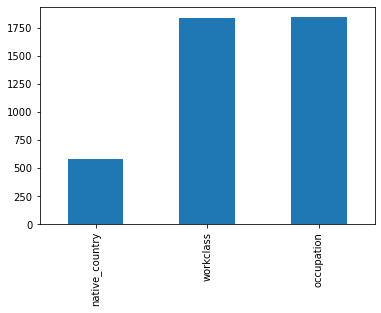

In [9]:
# data = df.replace("?", null)

missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
missing

## Transform

In [26]:
# cleaned_df = df.copy('true').dropna(axis=0)
def encode_income(df):
    df.income = df.income.apply(lambda x:0 if x=='<=50K' else 1)
    return df

def encode_sex(df):
    df.sex = df.sex.apply(lambda x:0 if x=='Female' else 1)
    return df


def simplify_ages(df):
    bins = (16, 20, 30, 40, 50, 60, 70, 80, 90)
    group_names = ['17-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
    categories = pd.cut(df.age, bins, labels=group_names)
    df['transform_age'] = categories
    return df

def transform_features(df):
    df = encode_income(df)
    df = encode_sex(df)
    df = simplify_ages(df)
    return df


tdf = transform_features(df)
# tdf.sample(5)


## Value Distribution
### Quantitative

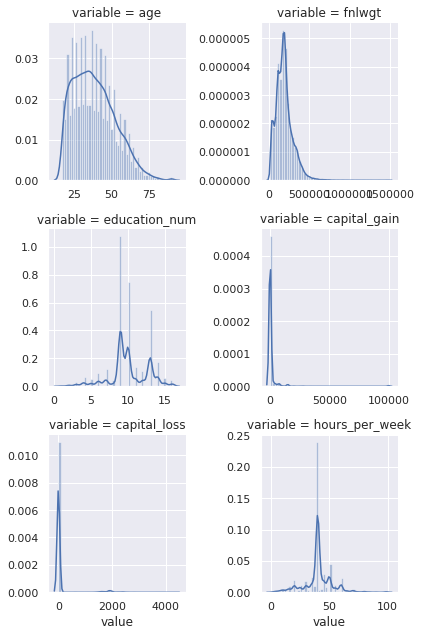

In [27]:
f = pd.melt(df, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

## Qualitative: 

In [12]:
# df2.dtypes

In [28]:
# df2 = df
# qualitative.remove('income')
# # qualitative
# df2.income = df2.income.astype('int64')
# for c in qualitative:
#     df2[c] = df2[c].astype('category')
#     if df2[c].isnull().any():
#         df2[c] = df2[c].cat.add_categories(['MISSING'])
#         df2[c] = df2[c].fillna('MISSING')

# def boxplot(x, y, **kwargs):
#     sns.boxplot(x=x, y=y)
#     x=plt.xticks(rotation=90)
# f = pd.melt(df2, id_vars=['income'], value_vars=qualitative)
# g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
# g = g.map(boxplot, "value", "income")



## Income Colerration
### Age, age group

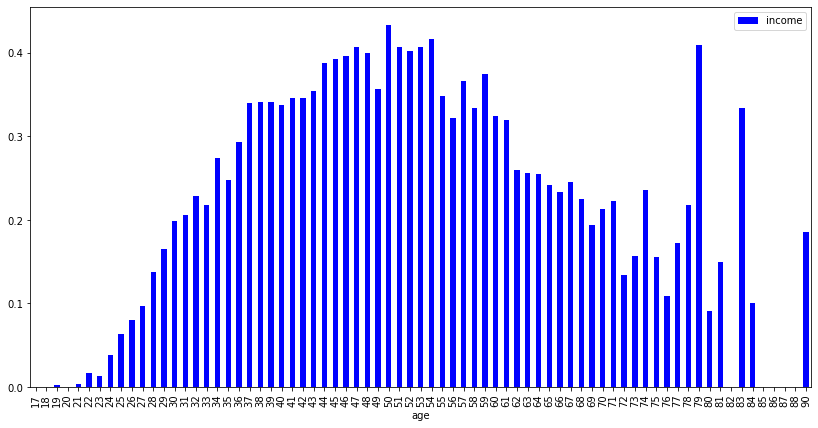

In [14]:
condition_pivot = df.pivot_table(index='age', 
                                       values='income', aggfunc=np.mean)
ax = condition_pivot.plot(kind='bar', color='blue', figsize=(14, 7))

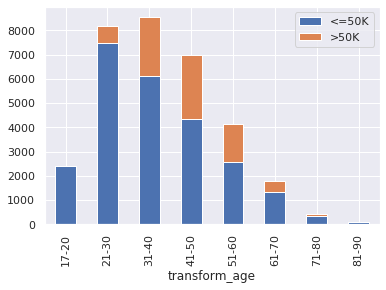

In [36]:
a = pd.concat([df[df.income==0].groupby('transform_age').income.count(), df[df.income==1].groupby('transform_age').income.count()], axis=1)
a.columns = ['<=50K', '>50K']
a.plot(kind='bar', stacked=True)

# df_rel = df[df.columns[1:]].div(df_total, 0)*100
# for n in df_rel:
#     for i, (cs, ab, pc, tot) in enumerate(zip(df.iloc[:, 1:].cumsum(1)[n], df[n], df_rel[n], df_total)):
#         plt.text(tot, i, str(tot), va='center')
#         plt.text(cs - ab/2, i, str(np.round(pc, 1)) + '%', va='center', ha='center')

### Education

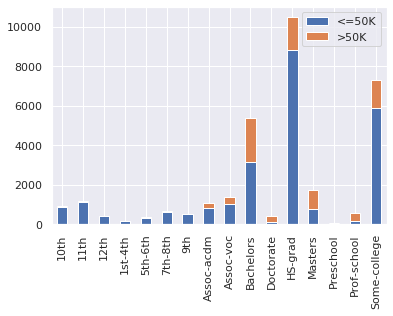

In [35]:
a = pd.concat([df[df.income==0].groupby('education').income.count(), df[df.income==1].groupby('education').income.count()], axis=1)
a.columns = ['<=50K', '>50K']
a.plot(kind='bar', stacked=True)

## Feature Correlation Matrix

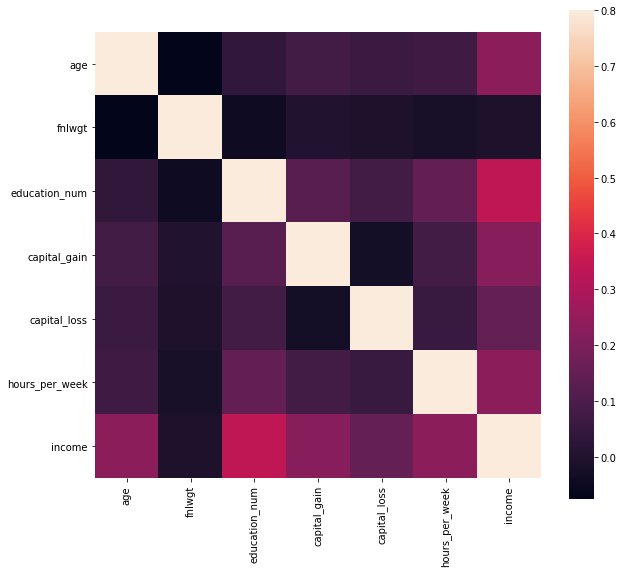

In [15]:
corrmat = tdf.corr()
f, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

### Features Choosing
#### Quantitative:
* **age:** ✅
* **fnlwgt:** ❌ is sampling weight, we just avoid it now for the simple
* **education_num:** ✅ 1-16 years of education
* **capital_gain:** ✅ capital gain beside salary
* **capital_loss:** ✅ capital lost beside salary
* **hour_per_week** ✅

#### Qualitative:
* **workclass:**
* ~~**education:** ~~ ❌ this is redundace with education_num and
* **marital_status:** ✅ 
* **occupation:** ✅
* **relationship:** ✅
* **race:** ✅
* **sex:** ✅
* ~~**native_country:**~~ ❌ remove due to most of instance is US
* **income:** : target column